In [5]:
import pandas as pd

In [6]:
column = ['user_id','item_id','rating','timestamp']
df = pd.read_csv(r'C:\Users\mithu\OneDrive\Desktop\python programs\movie system\file (1).tsv',sep='\t',names = column)
print(df.head())

   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742


In [7]:
movie = pd.read_csv(r'C:\Users\mithu\OneDrive\Desktop\python programs\movie system\Movie_Id_Titles (1).csv')
print(movie.head())

   item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


In [8]:
data = pd.merge(df,movie,on='item_id')
print(data.head())

   user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)


In [45]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [10]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [46]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head(10)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('darkgrid') 

<Axes: >

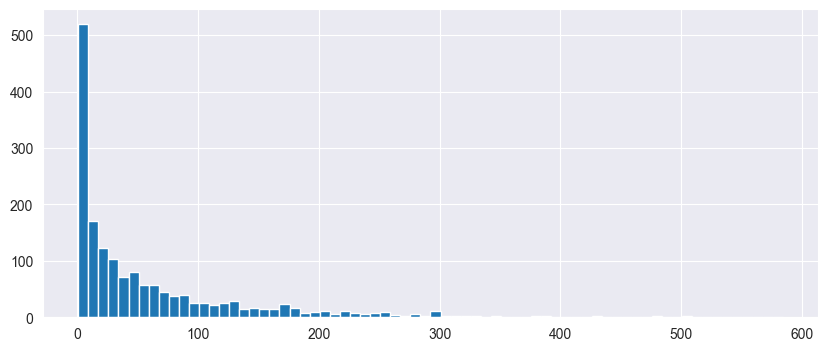

In [42]:
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

In [69]:
moviemat  = data.pivot_table(index = 'user_id',columns= 'title',values='rating')
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [72]:
starwar = moviemat['Star Wars (1977)']
contact = moviemat['Contact (1997)']
#starwar.head()
contact.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [95]:
similar_to_starwars = moviemat.corrwith(starwar) 
similar_to_contact = moviemat.corrwith(contact) 
print(similar_to_starwars)

c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [97]:

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [93]:

corr_contact = pd.DataFrame(similar_to_contact, columns =['Correlation']) 
corr_contact.dropna(inplace = True) 

corr_contact = corr_contact.join(ratings['num of ratings']) 
corr_contact[corr_contact['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
